# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('/content/Ice_cream selling data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1:].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Polynomial Regression model on the Training set

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [5]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.68  0.95]
 [30.48 32.28]
 [ 2.91  0.79]
 [ 6.79  3.78]
 [ 8.59  8.94]
 [16.06 12.57]
 [11.16  7.41]
 [20.21 22.84]
 [24.97 25.37]
 [20.31 13.28]]


## Evaluating the Model Performance

In [6]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.891597384697793

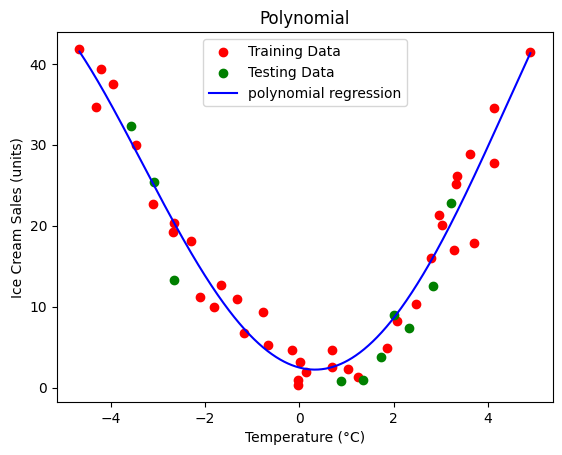

In [12]:
X_grid = np.arange(np.min(X), np.max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red', label = 'Training Data')
plt.scatter(X_test, y_test, color = 'green', label = 'Testing Data')
plt.plot(X_grid, regressor.predict(poly_reg.transform(X_grid)), color = 'blue', label = 'polynomial regression')
plt.title('Polynomial')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()